In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.stats as st
import scipy.io as scio

Set font size for plots

In [2]:
FS = 40

Import JSON files containing total cable lengths for each of the cfs in your analysis

In [3]:
p3_fname = 'data/cable_length_info/190125_p3_cf_cable_lengths.json'
p7_1_fname = 'data/cable_length_info/190125_p7_1_cf_cable_lengths.json'
p7_2_fname = 'data/cable_length_info/190125_p7_2_cf_cable_lengths.json'
p7_3_fname = 'data/cable_length_info/190125_p7_3_cf_cable_lengths.json'
with open(p3_fname,'r') as f:
    p3_cls = json.loads(f.read())
with open(p7_1_fname,'r') as f:
    p7_1_cls = json.loads(f.read())
with open(p7_2_fname,'r') as f:
    p7_2_cls = json.loads(f.read())
with open(p7_3_fname,'r') as f:
    p7_3_cls = json.loads(f.read())

Inspect key-value pairs for dictionaries (cable lengths should be in nm)

In [4]:
print(p3_cls.keys())
print(p7_1_cls.keys())
print(p7_2_cls.keys())
print(p7_3_cls.keys())

dict_keys(['segid', 'cls_nm'])
dict_keys(['segid', 'cls_nm', 'cf_id_maps'])
dict_keys(['segid', 'cls_nm', 'cf_id_maps'])
dict_keys(['segid', 'cls_nm', 'cf_id_maps'])


Get restricted cable length data

In [5]:
p3_r_fname = 'data/cable_length_info/190128_p3_cf_top-threefourths_cable_lengths.json'
p7_r_1_fname = 'data/cable_length_info/190128_p7_1_cf_top-threefourths_cable_lengths.json'
p7_r_2_fname = 'data/cable_length_info/190128_p7_2_cf_top-threefourths_cable_lengths.json'
p7_r_3_fname = 'data/cable_length_info/190128_p7_3_cf_top-threefourths_cable_lengths.json'
with open(p3_r_fname,'r') as f:
    p3_r_cls = json.loads(f.read())
with open(p7_r_1_fname,'r') as f:
    p7_1_r_cls = json.loads(f.read())
with open(p7_r_2_fname,'r') as f:
    p7_2_r_cls = json.loads(f.read())
with open(p7_r_3_fname,'r') as f:
    p7_3_r_cls = json.loads(f.read())

Print key-value pairs

In [6]:
print(p3_r_cls.keys())
print(p7_1_r_cls.keys())
print(p7_2_r_cls.keys())
print(p7_3_r_cls.keys())

dict_keys(['segid', 'top-part_cls_nm'])
dict_keys(['segid', 'top-part_cls_nm', 'cf_id_maps'])
dict_keys(['segid', 'top-part_cls_nm', 'cf_id_maps'])
dict_keys(['segid', 'top-part_cls_nm', 'cf_id_maps'])


***

Inspect cable length distributions

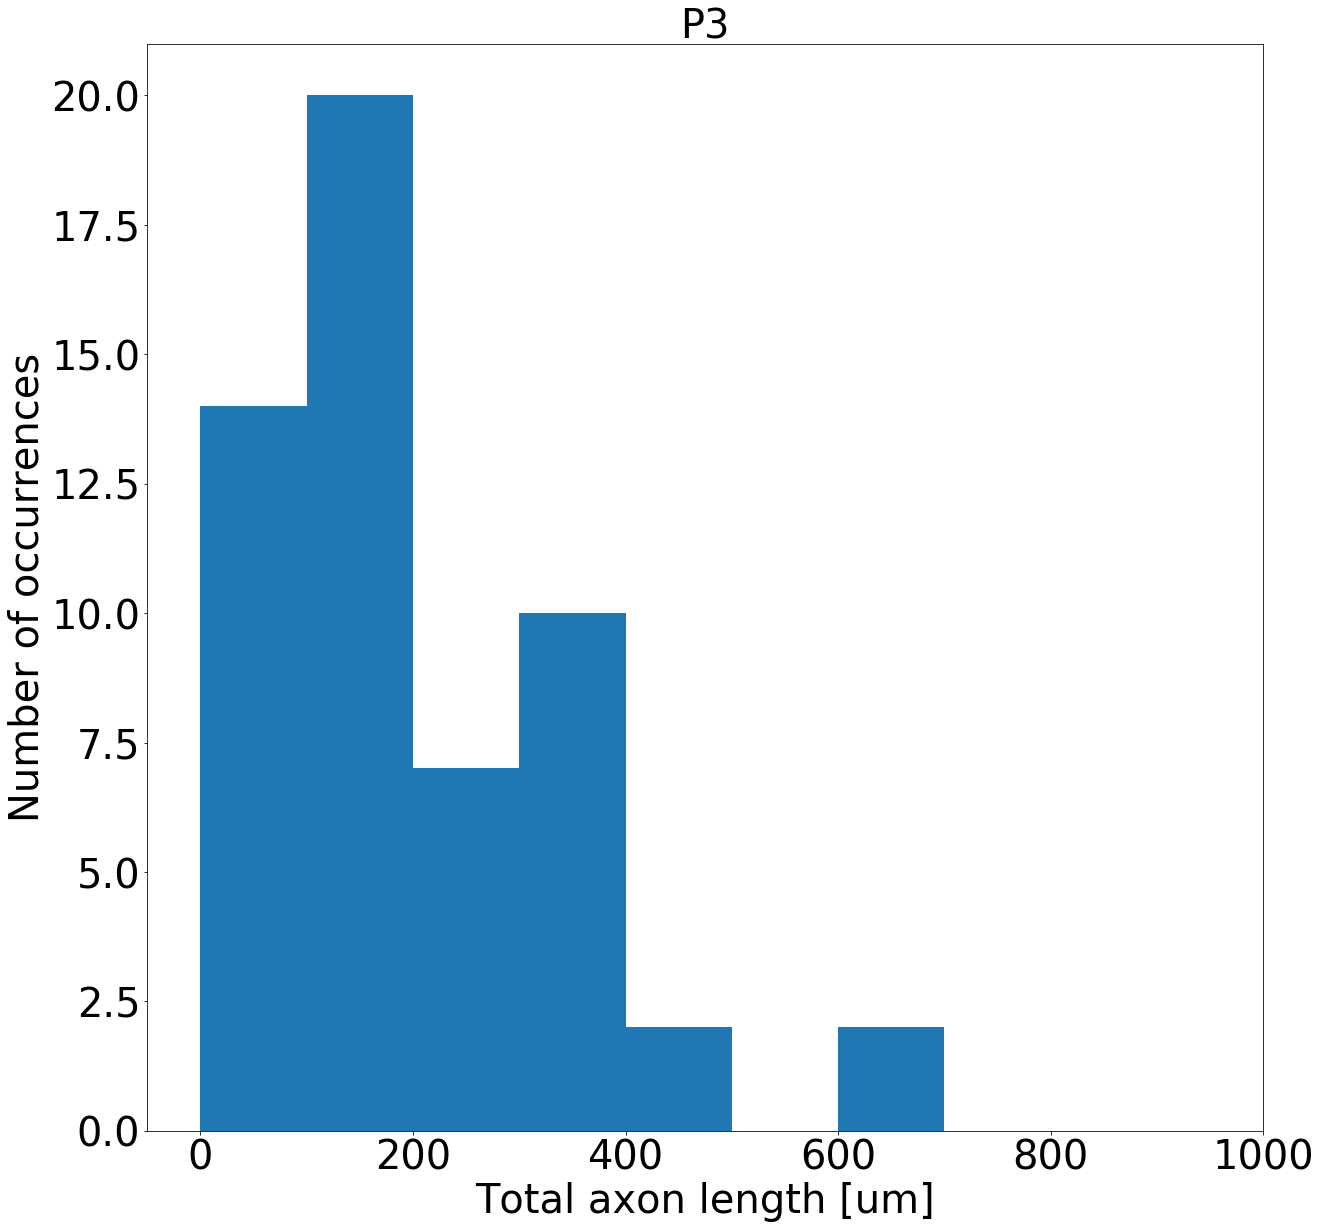

In [7]:
bin_edges = np.arange(0,1000,100)
p3_cls_um = [q/1000.0 for q in p3_cls['cls_nm']]
plt.figure(figsize=(20,20))
plt.hist(p3_cls_um,bins=bin_edges) # convert to um
plt.xlabel('Total axon length [um]',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.axis([-50, 1000, 0, 21])
plt.title('P3',fontsize=FS)
plt.tick_params(labelsize=FS)
p3_total_ax_len_fname = './data/figures/skel_dat/190218_p3_cf_tot_cl_um.png'
# plt.show()
plt.savefig(p3_total_ax_len_fname)

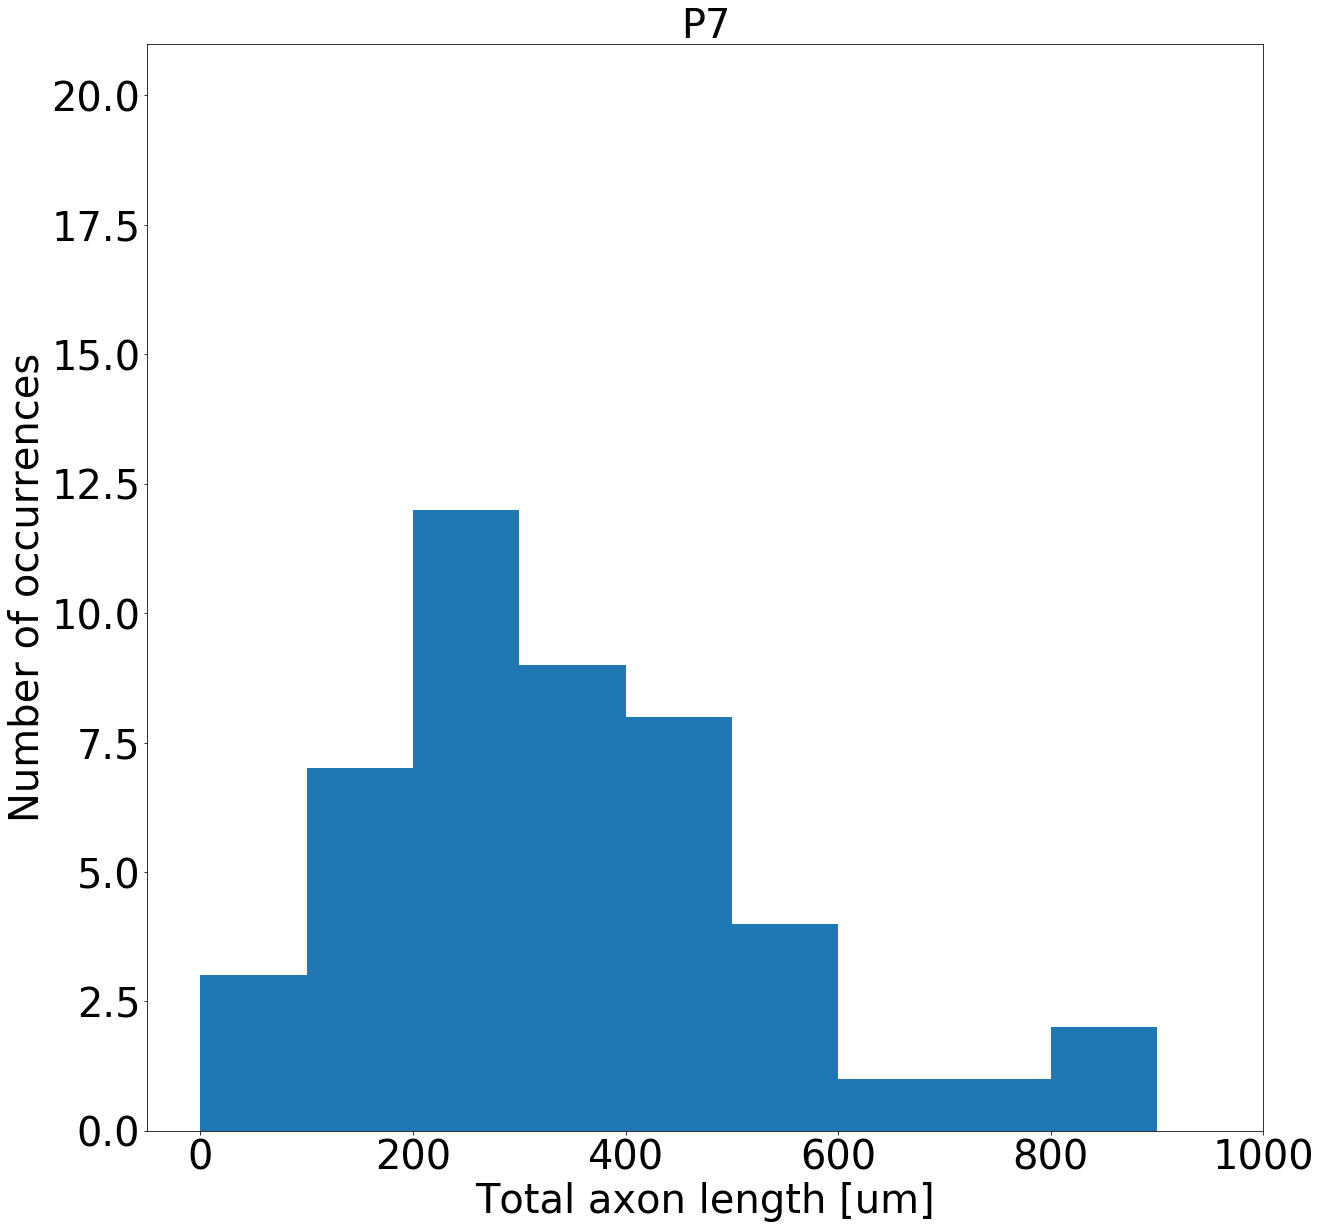

In [8]:
p7_1_cls_um = [q/1000.0 for q in p7_1_cls['cls_nm']]
p7_2_cls_um = [q/1000.0 for q in p7_2_cls['cls_nm']]
p7_3_cls_um = [q/1000.0 for q in p7_3_cls['cls_nm']]
p7_cls_um = p7_1_cls_um + p7_2_cls_um + p7_3_cls_um
plt.figure(figsize=(20,20))
plt.hist(p7_cls_um,bins=bin_edges)
plt.xlabel('Total axon length [um]',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.axis([-50, 1000, 0, 21])
plt.title('P7',fontsize=FS)
plt.tick_params(labelsize=FS)
p7_total_ax_len_fname = './data/figures/skel_dat/190218_p7_cf_tot_cl_um.png'
# plt.show()
plt.savefig(p7_total_ax_len_fname)

Plot the two distributions together

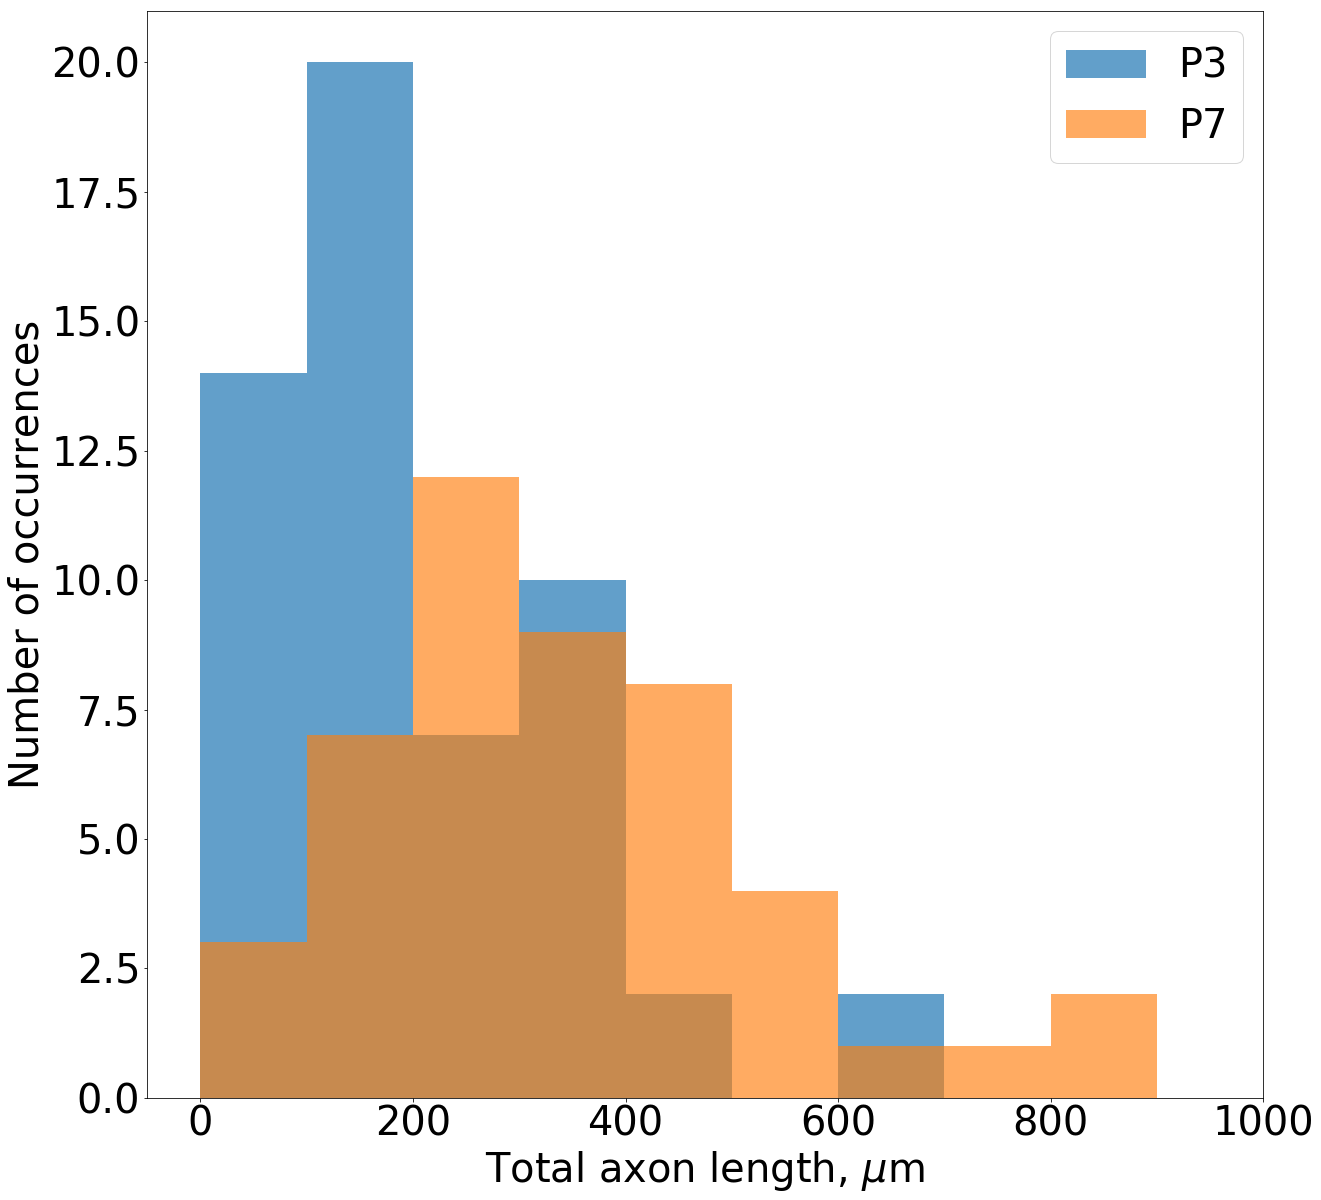

In [9]:
plt.figure(figsize=(20,20))
plt.hist(p3_cls_um,bins=bin_edges,label='P3',alpha=0.7) # convert to um
plt.hist(p7_cls_um,bins=bin_edges,label='P7',alpha=0.65)
plt.xlabel('Total axon length, $\mu$m',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.axis([-50, 1000, 0, 21])
plt.tick_params(labelsize=FS)
plt.legend(loc='best',fontsize=FS)
p3_p7_total_ax_len_fname = './data/figures/skel_dat/190218_p3_p7_cf_tot_cl_um.png'
# plt.show()
plt.savefig(p3_p7_total_ax_len_fname)

Even though they don't look alike, run a non-parametric test to see whether these distributions are statistically distinguishable

In [10]:
[wrs,p] = st.ranksums(p3_cls_um,p7_cls_um)
print(p)

2.0669665723706753e-05


Inspect medians of these two distributions

In [11]:
print(np.median(p3_cls_um))
print(np.median(p7_cls_um))

152.282
307.297


In [12]:
print(np.mean(p3_cls_um),np.std(p3_cls_um))
print(np.mean(p7_cls_um),np.std(p7_cls_um))

201.52096363636366 142.15704531614628
357.2902916666667 202.76945105915632


***

Inspect the restricted cable length distributions

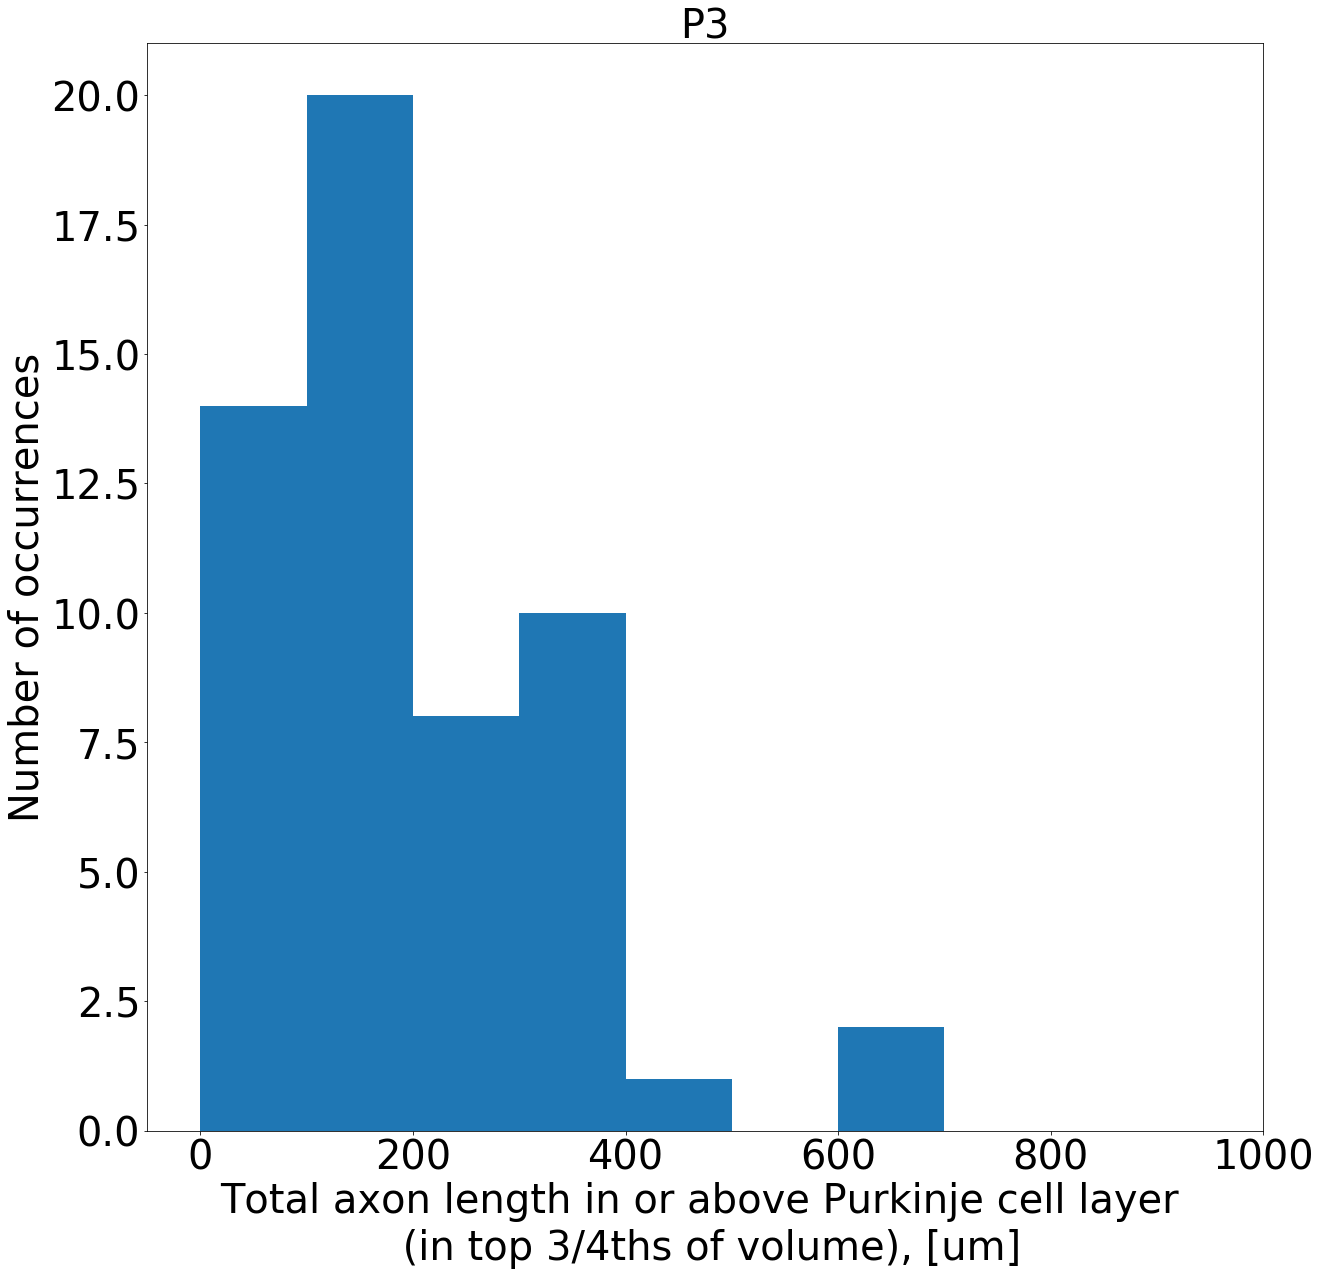

In [13]:
bin_edges_r = np.arange(0,1000,100)
p3_r_cls_um = [q/1000.0 for q in p3_r_cls['top-part_cls_nm']]
plt.figure(figsize=(20,20))
plt.hist(p3_r_cls_um,bins=bin_edges_r) # convert to um
plt.xlabel('Total axon length in or above Purkinje cell layer \n (in top 3/4ths of volume), [um]',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.axis([-50, 1000, 0, 21])
plt.title('P3',fontsize=FS)
plt.tick_params(labelsize=FS)
p3_PCL_ax_len_fname = './data/figures/skel_dat/190218_p3_cf_pcl_axl_um.png'
# plt.show()
plt.savefig(p3_PCL_ax_len_fname)

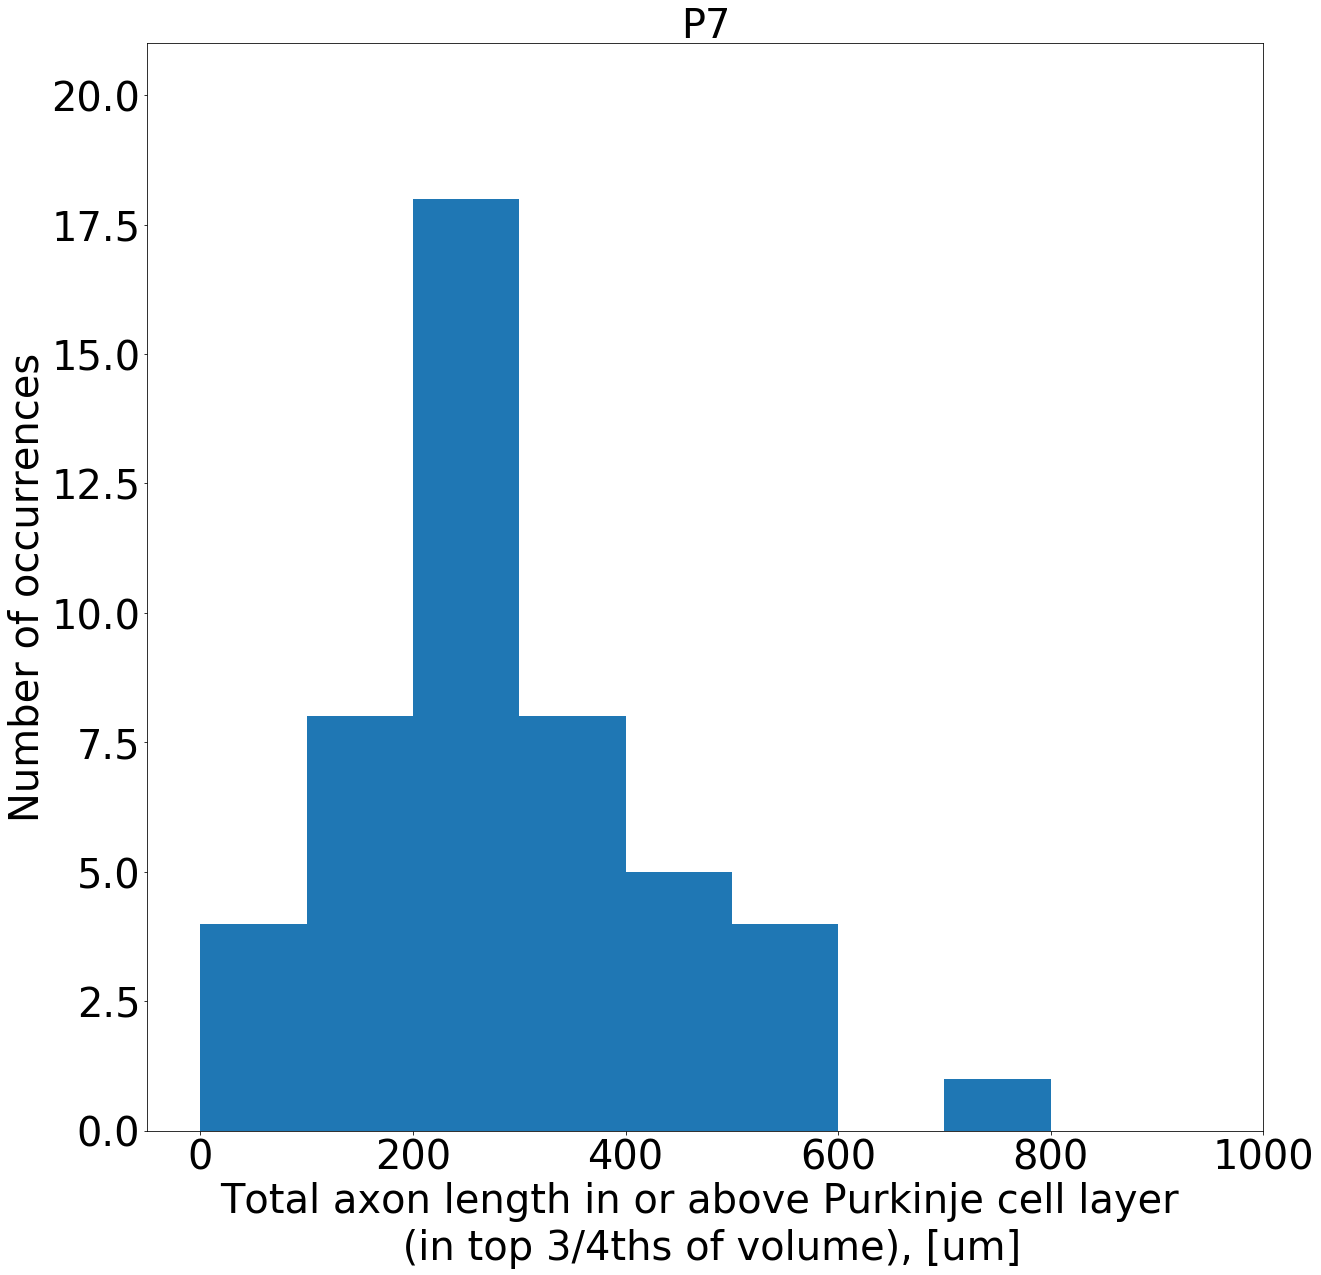

In [14]:
p7_1_r_cls_um = [q/1000.0 for q in p7_1_r_cls['top-part_cls_nm']]
p7_2_r_cls_um = [q/1000.0 for q in p7_2_r_cls['top-part_cls_nm']]
p7_3_r_cls_um = [q/1000.0 for q in p7_3_r_cls['top-part_cls_nm']]
p7_r_cls_um = p7_1_r_cls_um + p7_2_r_cls_um + p7_3_r_cls_um
plt.figure(figsize=(20,20))
plt.hist(p7_r_cls_um,bins=bin_edges_r)
plt.xlabel('Total axon length in or above Purkinje cell layer \n (in top 3/4ths of volume), [um]',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.axis([-50, 1000, 0, 21])
plt.title('P7',fontsize=FS)
plt.tick_params(labelsize=FS)
p7_PCL_ax_len_fname = './data/figures/skel_dat/190218_p7_cf_pcl_axl_um.png'
# plt.show()
plt.savefig(p7_PCL_ax_len_fname)

Plot both together

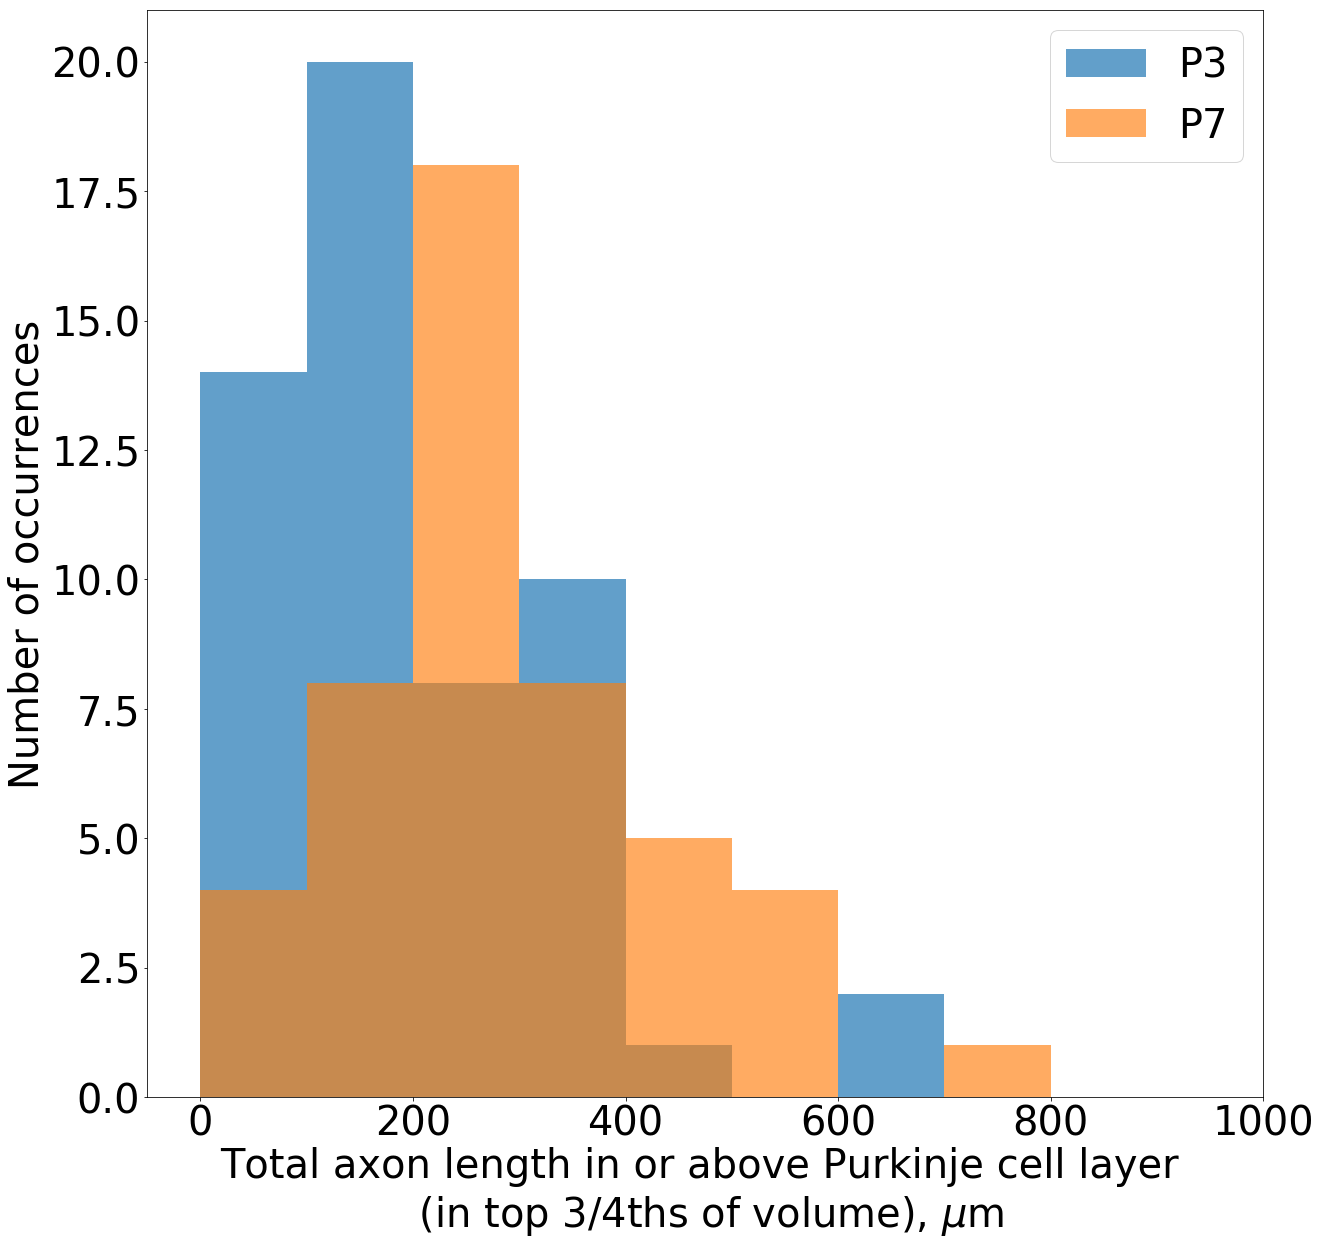

In [15]:
plt.figure(figsize=(20,20))
plt.hist(p3_r_cls_um,bins=bin_edges_r,label='P3',alpha=0.7) # convert to um
plt.hist(p7_r_cls_um,bins=bin_edges_r,label='P7',alpha=0.65)
plt.xlabel('Total axon length in or above Purkinje cell layer \n (in top 3/4ths of volume), $\mu$m',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.axis([-50, 1000, 0, 21])
plt.tick_params(labelsize=FS)
plt.legend(loc='best',fontsize=FS)
p3_p7_PCL_ax_len_fname = './data/figures/skel_dat/190218_p3_p7_cf_pcl_axl_um.png'
# plt.show()
plt.savefig(p3_p7_PCL_ax_len_fname)

Perform Wilcoxon rank sum test on this data

In [16]:
[wrsr,pr] = st.ranksums(p3_r_cls_um,p7_r_cls_um)
print(pr)

0.0005062552347559114


In [17]:
print(np.median(p3_r_cls_um))
print(np.median(p7_r_cls_um))

152.282
274.491


In [18]:
print(np.mean(p3_r_cls_um),np.std(p3_r_cls_um))
print(np.mean(p7_r_cls_um),np.std(p7_r_cls_um))

197.7399272727273 138.44992130032952
292.04170833333336 146.96414001664348


***

Check the restricted vs. the non-restricted cable length distributions for both ages

Text(0.5, 1.0, 'P3 CF Segment Lengths')

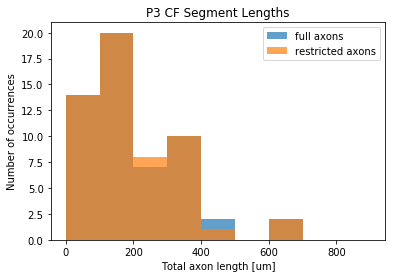

In [19]:
# p3
plt.figure()
plt.hist(p3_cls_um,bins=bin_edges,alpha=0.7,label='full axons')
plt.hist(p3_r_cls_um,bins=bin_edges,alpha=0.7,label='restricted axons')
plt.xlabel('Total axon length [um]')
plt.ylabel('Number of occurrences')
# plt.axis([0, 1000, 0, 5])
plt.legend()
plt.title('P3 CF Segment Lengths')

Text(0.5, 1.0, 'P7 CF Segment Lengths')

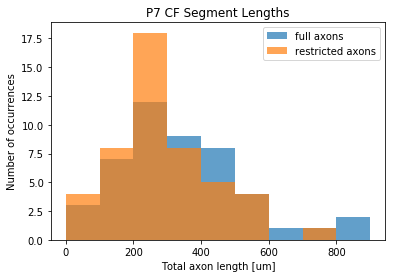

In [20]:
# p7
plt.figure()
plt.hist(p7_cls_um,bins=bin_edges,alpha=0.7,label='full axons')
plt.hist(p7_r_cls_um,bins=bin_edges,alpha=0.7,label='restricted axons')
plt.xlabel('Total axon length [um]')
plt.ylabel('Number of occurrences')
# plt.axis([0, 1000, 0, 5])
plt.legend()
plt.title('P7 CF Segment Lengths')

***

Import the connectivity matrices so you can look at the number of synapses formed by these cfs as a function of their cable length

In [21]:
p3connd = scio.loadmat('./data/connectivity_matrices/P3_Observed_PC_Connectivity_Synapse_Numbers_gteq_5_syns_gteq_40pc_PC_targets.mat')
p3cfd = scio.loadmat('./data/connectivity_matrices/P3_axon_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_40pc_PC_syns.mat')
p3pcd = scio.loadmat('./data/connectivity_matrices/P3_PC_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_40pc_PC_syns.mat')

p7connd = scio.loadmat('./data/connectivity_matrices/P7_Observed_PC_Connectivity_Synapse_Numbers_gteq_5_syns_gteq_70pc_PC_targets.mat')
p7cfd = scio.loadmat('./data/connectivity_matrices/P7_axon_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_70pc_PC_syns.mat')
p7pcd = scio.loadmat('./data/connectivity_matrices/P7_PC_IDs_for_Obs_PC_Conn_Syn_Nums_gteq_5_syns_gteq_70pc_PC_syns.mat')

In [22]:
p3conn = p3connd['P3_PCconnectivity']
p3cf = p3cfd['P3_PCconn_axon_IDs']
p3pc = p3pcd['P3_PCconn_PC_IDs']

p7conn = p7connd['P7_PCconnectivity']
p7cf = p7cfd['P7_PCconn_axon_IDs']
p7pc = p7pcd['P7_PCconn_PC_IDs']

In [23]:
# print(p3conn.shape,p3cf.shape,p3pc.shape) # debugging
# print(p7conn.shape,p7cf.shape,p7pc.shape) # debugging

Get the number of synapses that correspond to the 90th percentile for the p3 and p7 distributions

In [24]:
p3connnz = [q for q in p3conn.flatten() if q != 0]
p7connnz = [q for q in p7conn.flatten() if q != 0]
p3_90pc = np.percentile(p3connnz,90)
p7_90pc = np.percentile(p7connnz,90)
# print(p3_90pc) # debugging
# print(p7_90pc) # debugging

For each cf id, get the row in the connectivity matrix, find the cable length, and store the result in a new dictionary

In [25]:
# p3
p3_cf_seg_ids = p3_cls['segid']
p3_r_cf_seg_ids = p3_r_cls['segid']
p3nsyns = []
p3clres = []
for c in p3_cf_seg_ids:
#     print(c) #debugging
    ridcurr,cidcurr = np.where(p3cf == c)
    rowcurr = p3conn[ridcurr,:][0]
    rowcurrnz = [q for q in rowcurr if q != 0]
    ridr = [i for i,q in enumerate(p3_r_cf_seg_ids) if q == c][0]
    rclum = p3_r_cls['top-part_cls_nm'][ridr]
    p3clres.append(rclum/1000.0)
#     print(rowcurr) # debugging
#     print(rowcurrnz)
#     print('\n')
    p3nsyns.append(rowcurrnz)
p3_all_info = {'segid':p3_cf_seg_ids,'cl_um':p3_cls_um,'nsyns':p3nsyns,'r_cl_um':p3clres}

In [26]:
# p7
p7_cf_seg_ids = p7_1_cls['segid'] + p7_2_cls['segid'] + p7_3_cls['segid']
# print(p7_cf_seg_ids)
p7_cf_seg_id_maps = p7_1_cls['cf_id_maps'] + p7_2_cls['cf_id_maps'] + p7_3_cls['cf_id_maps']
# print(p7_cf_seg_id_maps)
p7_1_r_cf_seg_id_maps = p7_1_r_cls['cf_id_maps']
p7_2_r_cf_seg_id_maps = p7_2_r_cls['cf_id_maps']
p7_3_r_cf_seg_id_maps = p7_3_r_cls['cf_id_maps']
p7nsyns = []
p7clres = []
for c in p7_cf_seg_id_maps:
#     print(c) # debugging
    ridcurr,cidcurr = np.where(p7cf == c)
    rowcurr = p7conn[ridcurr,:][0]
    rowcurrnz = [q for q in rowcurr if q != 0]
    if (c in p7_1_r_cf_seg_id_maps):
        ridr = [i for i,q in enumerate(p7_1_r_cf_seg_id_maps) if q == c][0]
        rclum = p7_1_r_cls['top-part_cls_nm'][ridr]
        p7clres.append(rclum/1000.0)
    elif (c in p7_2_r_cf_seg_id_maps):
        ridr = [i for i,q in enumerate(p7_2_r_cf_seg_id_maps) if q == c][0]
        rclum = p7_2_r_cls['top-part_cls_nm'][ridr]
        p7clres.append(rclum/1000.0)
    elif (c in p7_3_r_cf_seg_id_maps):
        ridr = [i for i,q in enumerate(p7_3_r_cf_seg_id_maps) if q == c][0]
        rclum = p7_3_r_cls['top-part_cls_nm'][ridr]
        p7clres.append(rclum/1000.0)  
#     print(rowcurr) # debugging
#     print(rowcurrnz)
#     print('\n')
    p7nsyns.append(rowcurrnz)
p7_all_info = {'segid':p7_cf_seg_ids,'mapped_segid':p7_cf_seg_id_maps,'cl_um':p7_cls_um,'nsyns':p7nsyns,'r_cl_um':p7clres}

***

Plot the total number of synapses formed by each climbing fiber per unit length (by dividing by the total cable length)

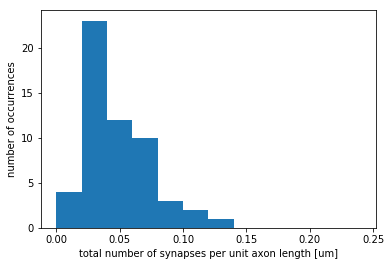

In [27]:
# p3
plt.figure()
spec_p3_ns = []
be_nsyns = np.arange(0,25,2)*0.01
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = np.sum(p3_all_info['nsyns'][cid])
    spec_p3_ns.append(nsdistcurr/clcurr)
plt.hist(spec_p3_ns,bins=be_nsyns)
plt.xlabel('total number of synapses per unit axon length [um]')
plt.ylabel('number of occurrences')
plt.show()

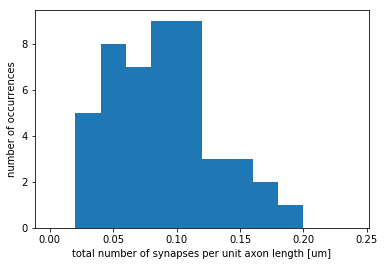

In [28]:
# p7
plt.figure()
spec_p7_ns = []
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = np.sum(p7_all_info['nsyns'][cid])
    spec_p7_ns.append(nsdistcurr/clcurr)
plt.hist(spec_p7_ns,bins=be_nsyns)
plt.xlabel('total number of synapses per unit axon length [um]')
plt.ylabel('number of occurrences')
plt.show()

Perform a Wilcoxon rank-sum test on these number of synapses per unit length distributions

In [29]:
[wrsns,pns] = st.ranksums(spec_p3_ns,spec_p7_ns)
print(pns)

2.794498991200418e-07


In [30]:
print('p3 median n syns tot per um: ',np.median(spec_p3_ns))
print('p7 median n syns tot per um: ',np.median(spec_p7_ns))

p3 median n syns tot per um:  0.04389760569916344
p7 median n syns tot per um:  0.0875026860603441


***

Plot the total number of synapses formed divided by the length of the axons when they are restricted to roughly the Purkinje cell layer

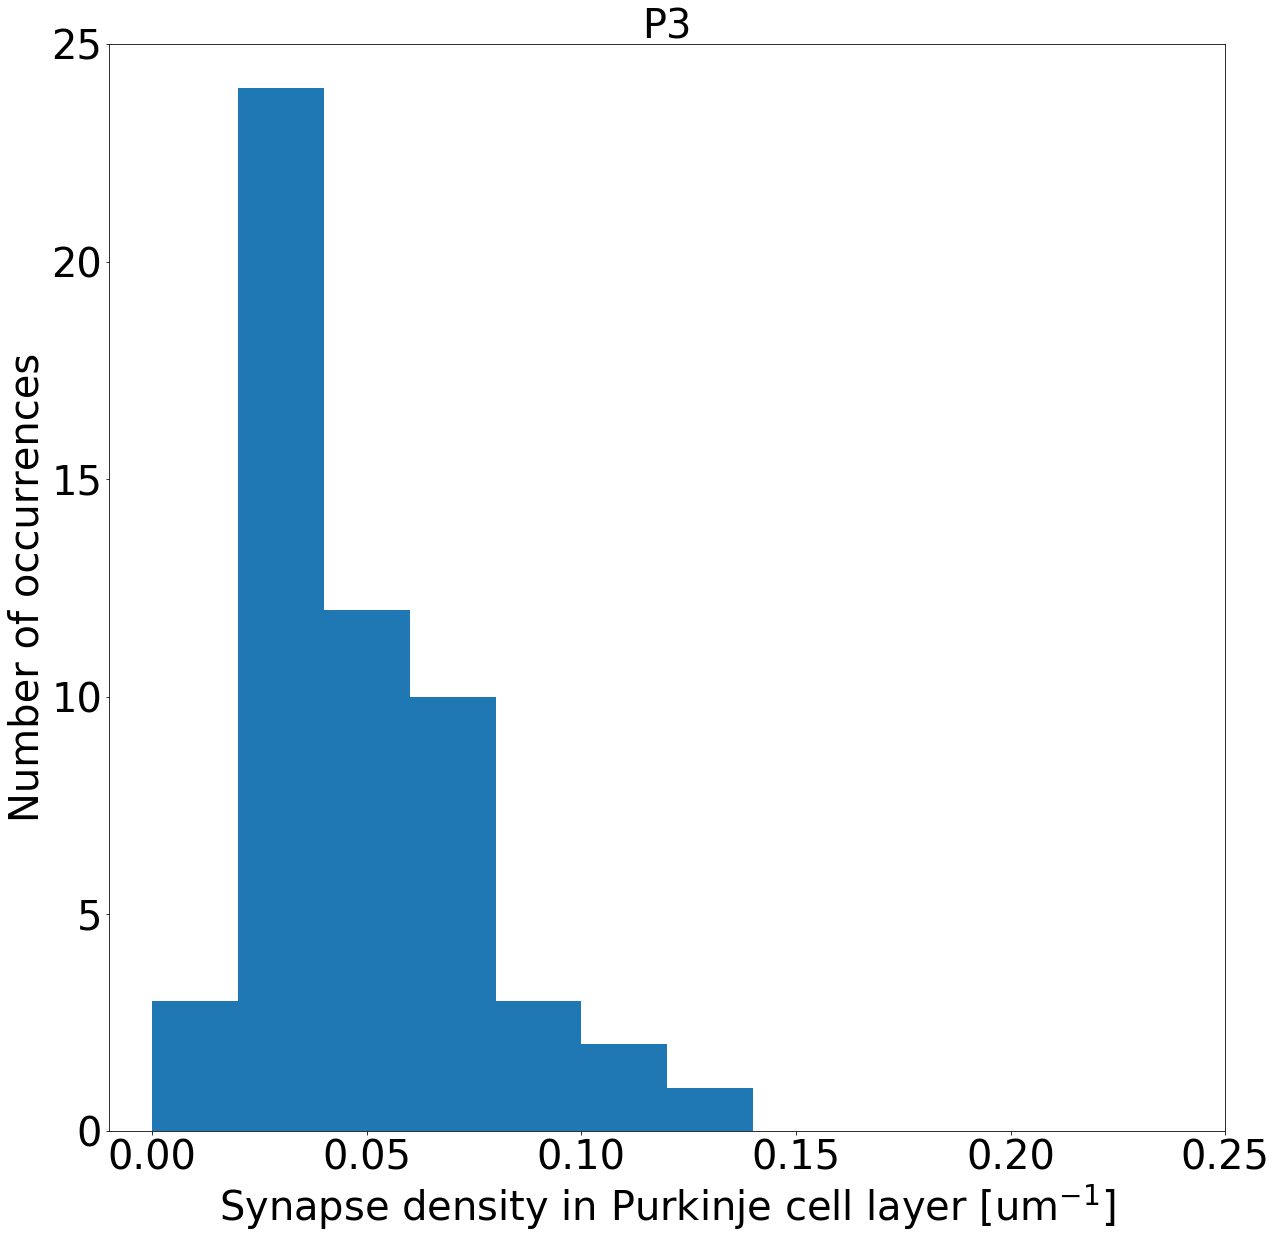

In [31]:
# p3
plt.figure(figsize=(20,20))
spec_p3_r_ns = []
be_nsyns = np.arange(0,25,2)*0.01
for cid in range(len(p3_all_info['segid'])):
    rclcurr = p3_all_info['r_cl_um'][cid]
    nsdistcurr = np.sum(p3_all_info['nsyns'][cid])
    spec_p3_r_ns.append(nsdistcurr/rclcurr)
plt.hist(spec_p3_r_ns,bins=be_nsyns)
plt.xlabel('Synapse density in Purkinje cell layer [um$^{-1}$]',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.title('P3',fontsize=FS)
plt.tick_params(labelsize=FS)
plt.axis([-0.01,0.25,0,25])
p3_sd_fname = './data/figures/skel_dat/190218_p3_cf_syn_dens_pcl_um-1.png'
# plt.show()
plt.savefig(p3_sd_fname)

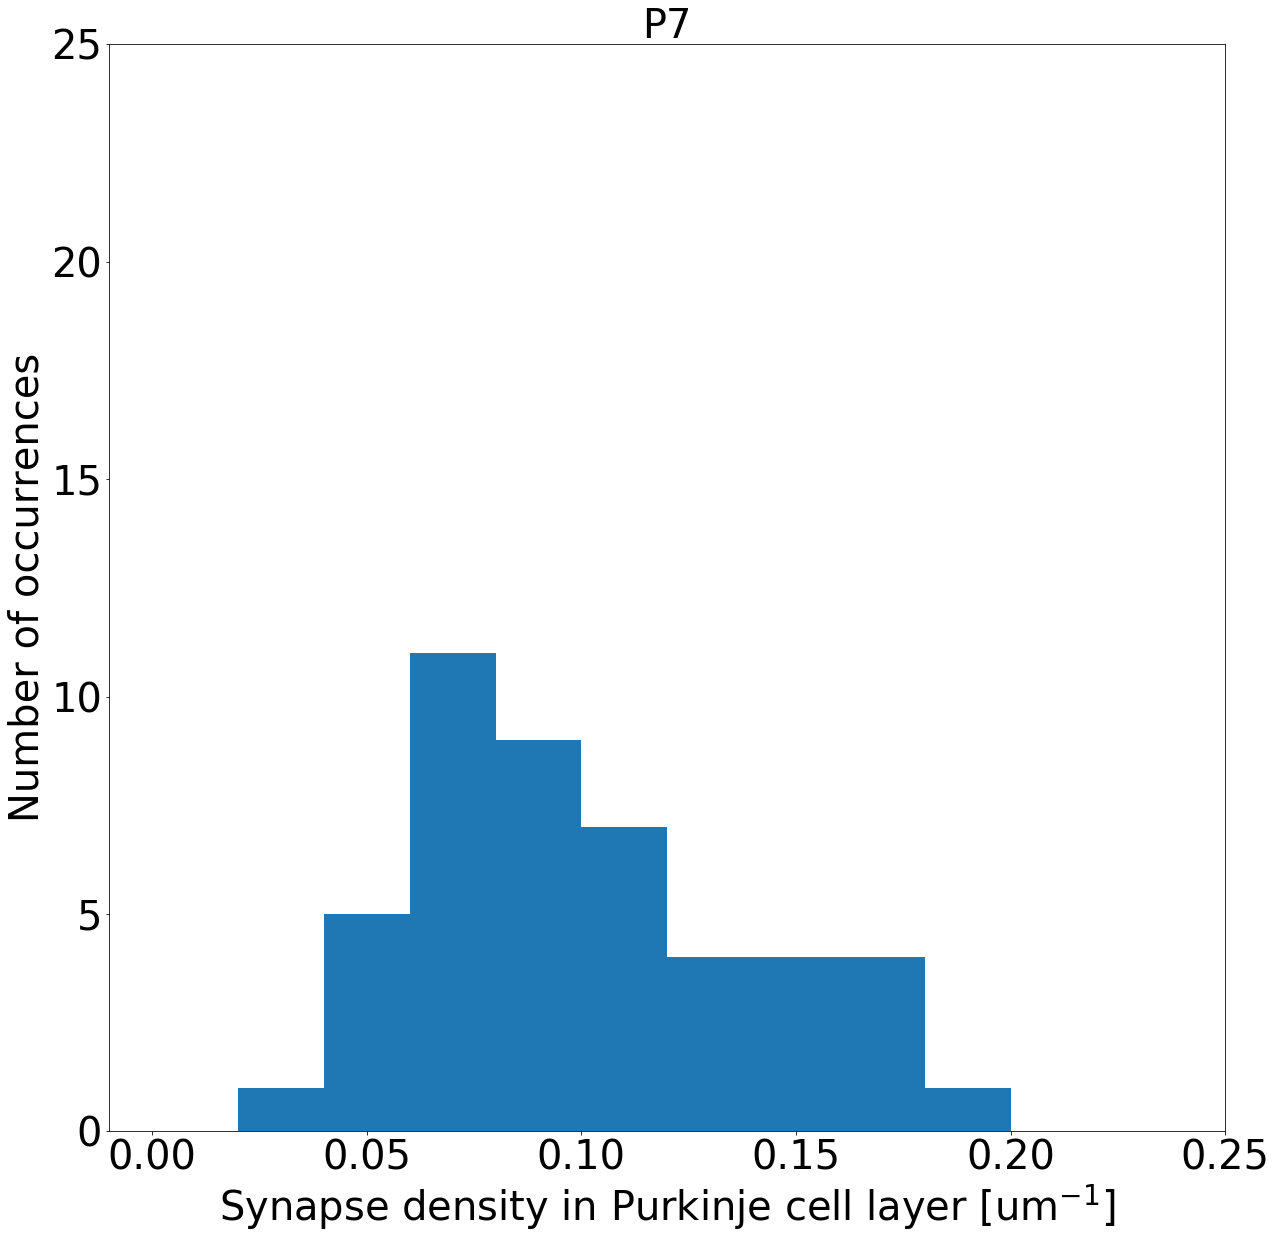

In [32]:
# p7
plt.figure(figsize=(20,20))
spec_p7_r_ns = []
be_nsyns = np.arange(0,25,2)*0.01
for cid in range(len(p7_all_info['segid'])):
    rclcurr = p7_all_info['r_cl_um'][cid]
    nsdistcurr = np.sum(p7_all_info['nsyns'][cid])
    spec_p7_r_ns.append(nsdistcurr/rclcurr)
plt.hist(spec_p7_r_ns,bins=be_nsyns)
plt.xlabel('Synapse density in Purkinje cell layer [um$^{-1}$]',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.title('P7',fontsize=FS)
plt.tick_params(labelsize=FS)
plt.axis([-0.01,0.25,0,25])
p7_sd_fname = './data/figures/skel_dat/190218_p7_cf_syn_dens_pcl_um-1.png'
# plt.show()
plt.savefig(p7_sd_fname)

Plot both distributions together

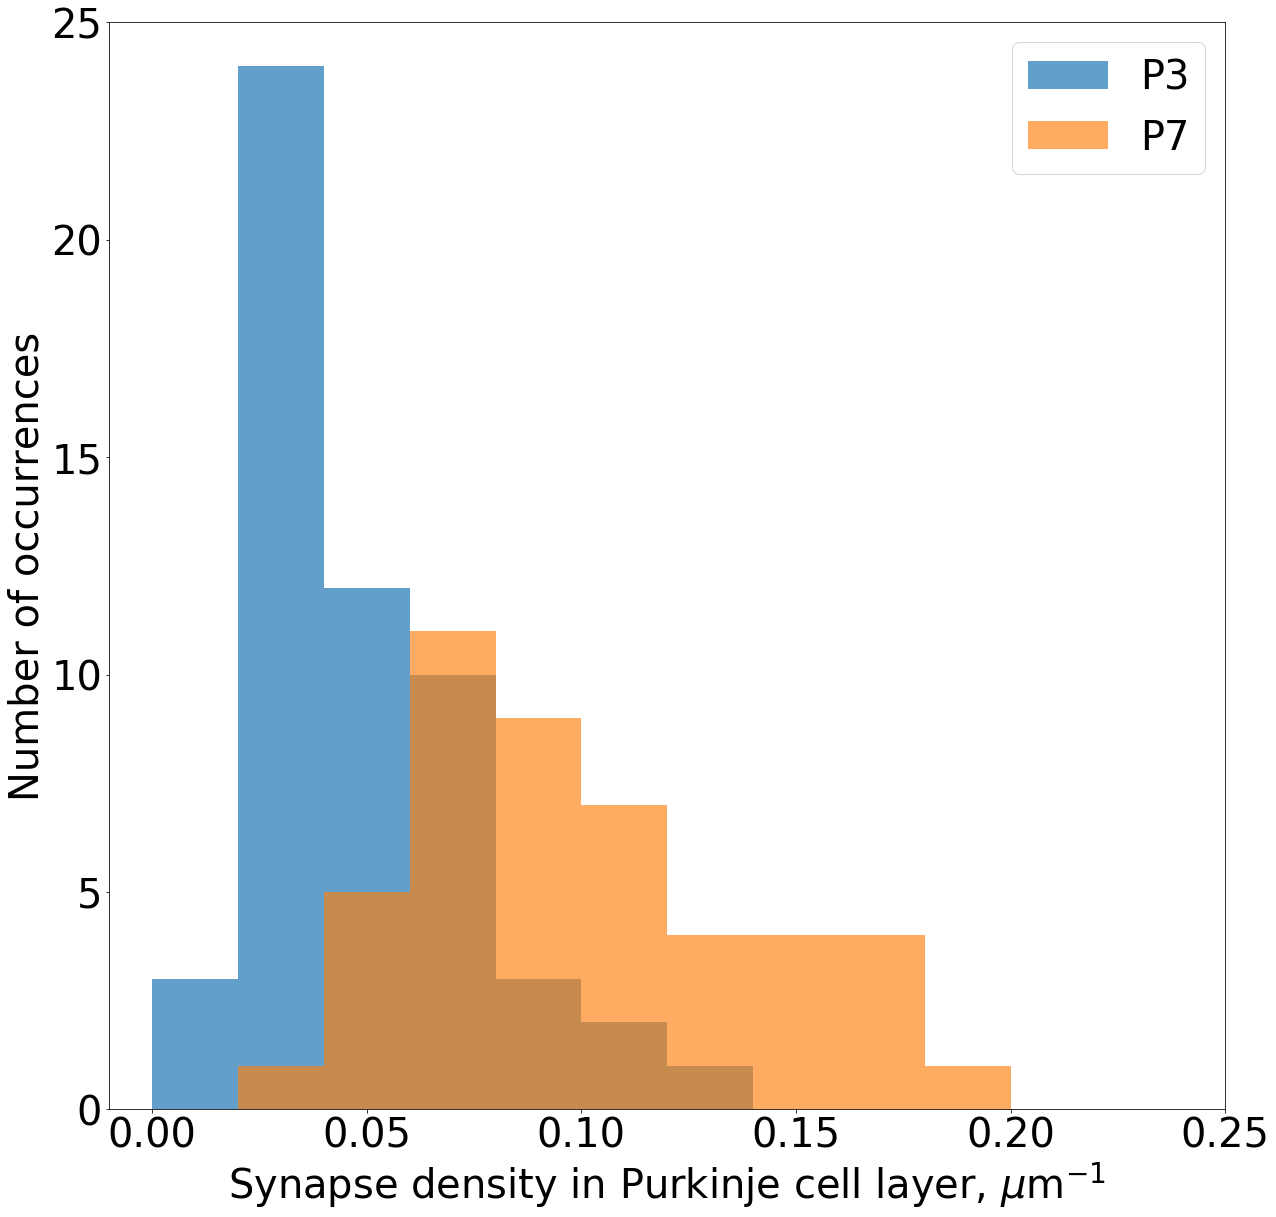

In [33]:
plt.figure(figsize=(20,20))
plt.hist(spec_p3_r_ns,bins=be_nsyns,label='P3',alpha=0.7)
plt.hist(spec_p7_r_ns,bins=be_nsyns,label='P7',alpha=0.65)
plt.xlabel('Synapse density in Purkinje cell layer, $\mu$m$^{-1}$',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
plt.tick_params(labelsize=FS)
plt.axis([-0.01,0.25,0,25])
plt.legend(loc='best',fontsize=FS)
p3_p7_sd_fname = './data/figures/skel_dat/190218_p3_p7_cf_syn_dens_pcl_um-1.png'
# plt.show()
plt.savefig(p3_p7_sd_fname)

Perform Wilcoxon rank-sum test on these two distributions

In [34]:
[wrsrns,prns] = st.ranksums(spec_p3_r_ns,spec_p7_r_ns)
print(prns)

2.6654212792633273e-11


In [35]:
print(np.median(spec_p3_r_ns))
print(np.median(spec_p7_r_ns))

0.04389760569916344
0.09293648511353209


In [36]:
print(np.mean(spec_p3_r_ns),np.std(spec_p3_r_ns))
print(np.mean(spec_p7_r_ns),np.std(spec_p7_r_ns))

0.04934225284196409 0.024359659537132046
0.10474014834515193 0.048203792329013076


***

Plot the distribution of numbers of synapses vs. the total cable length for each climbing fiber segment

In [37]:
type(p7_all_info['nsyns'][0])

list

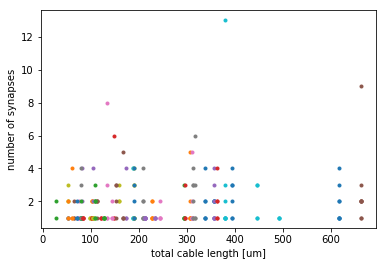

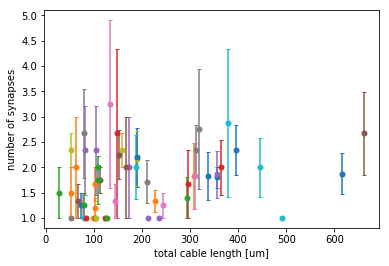

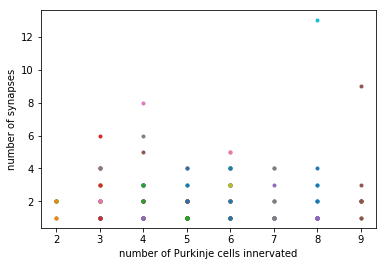

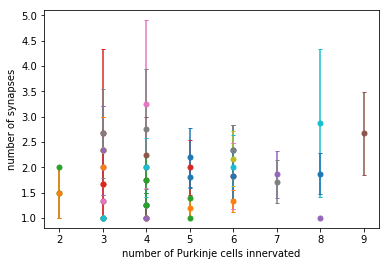

/usr/people/amw7/pinky100_VENV_python3p6/VENV_1/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead
/usr/people/amw7/pinky100_VENV_python3p6/VENV_1/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead


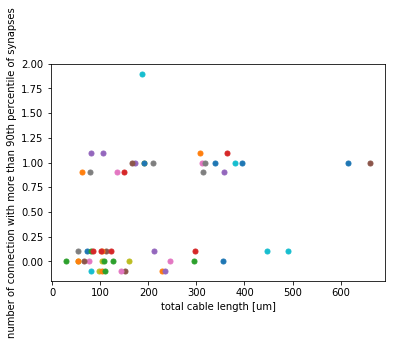

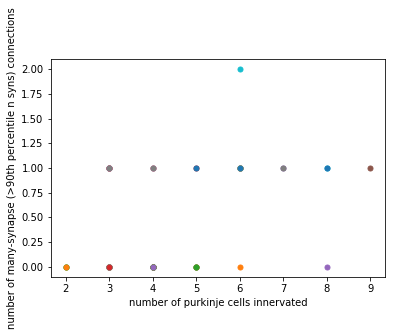

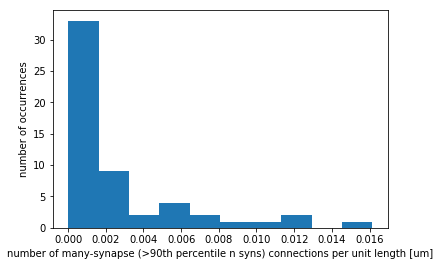

In [38]:
# p3
# first plot the raw distributions
plt.figure()
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    plt.plot(np.tile(clcurr,(len(nsdistcurr),1)),nsdistcurr,'.')
plt.xlabel('total cable length [um]')
plt.ylabel('number of synapses')
plt.show()
# next plot the mean and standard distribution
plt.figure()
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    plt.errorbar(clcurr,np.mean(nsdistcurr),yerr=st.sem(nsdistcurr),marker='.',capsize=2,markersize=10)
plt.xlabel('total cable length [um]')
plt.ylabel('number of synapses')
plt.show()
# plot the raw distributions vs. the number of purkinje cells innervated
plt.figure()
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    plt.plot(np.tile(len(nsdistcurr),(len(nsdistcurr),1)),nsdistcurr,'.')
plt.xlabel('number of Purkinje cells innervated')
plt.ylabel('number of synapses')
plt.show()
# next plot the mean and standard distribution vs. the number of purkinje cells innervated
plt.figure()
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    plt.errorbar(len(nsdistcurr),np.mean(nsdistcurr),yerr=st.sem(nsdistcurr),marker='.',capsize=2,markersize=10)
plt.xlabel('number of Purkinje cells innervated')
plt.ylabel('number of synapses')
plt.show()
# plot number of times each cf forms greater than the 90th percentile of the synapse distribution
# number of synapses onto a Purkinje cell
plt.figure()
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    ngt90pc = len([q for q in nsdistcurr if q > p3_90pc])
    xjitter = np.random.random_integers(low=-1,high=1,size=1)*0.1
    yjitter = np.random.random_integers(low=-1,high=1,size=1)*0.1
    plt.plot(clcurr+xjitter,ngt90pc+yjitter,'.',markersize=10)
plt.xlabel('total cable length [um]')
plt.ylabel('number of connection with more than 90th percentile of synapses')
plt.show()
# plot the number of these larger connections vs. the number of purkinje cells innervated
plt.figure()
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    ngt90pc = len([q for q in nsdistcurr if q > p3_90pc])
    plt.plot(len(nsdistcurr),ngt90pc,'.',markersize=10)
plt.xlabel('number of purkinje cells innervated')
plt.ylabel('number of many-synapse (>90th percentile n syns) connections')
plt.show()
# plot the number of these larger connections normalized by the total cable length
plt.figure()
spec_p3_nls = []
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    ngt90pc = len([q for q in nsdistcurr if q > p3_90pc])
    spec_p3_nls.append(ngt90pc/clcurr)
plt.hist(spec_p3_nls)
plt.xlabel('number of many-synapse (>90th percentile n syns) connections per unit length [um]')
plt.ylabel('number of occurrences')
plt.show()

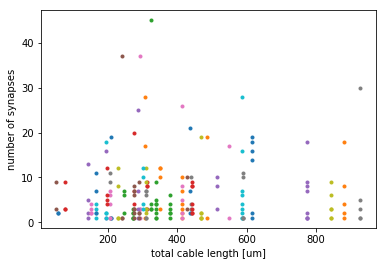

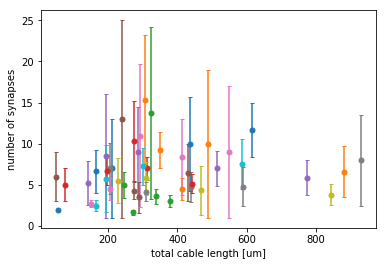

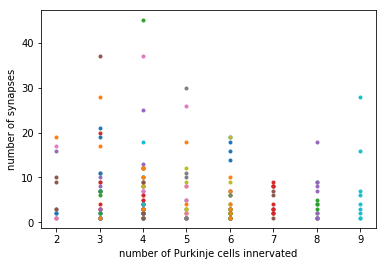

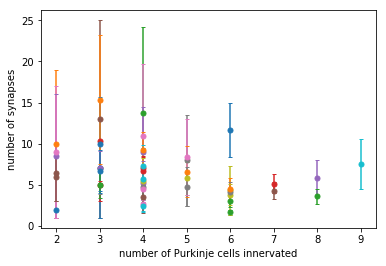

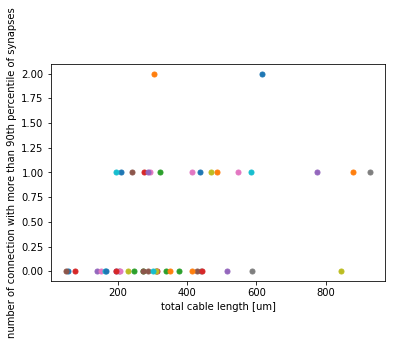

/usr/people/amw7/pinky100_VENV_python3p6/VENV_1/lib/python3.6/site-packages/ipykernel_launcher.py:55: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead
/usr/people/amw7/pinky100_VENV_python3p6/VENV_1/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead


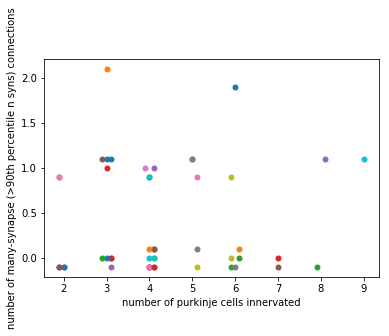

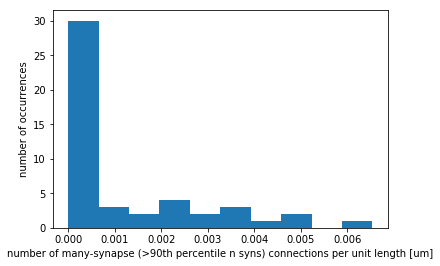

In [39]:
# p7
# first plot the raw distributions
plt.figure()
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    plt.plot(np.tile(clcurr,(len(nsdistcurr),1)),nsdistcurr,'.')
plt.xlabel('total cable length [um]')
plt.ylabel('number of synapses')
plt.show()
# next plot the mean and standard distribution
plt.figure()
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    plt.errorbar(clcurr,np.mean(nsdistcurr),yerr=st.sem(nsdistcurr),marker='.',capsize=2,markersize=10)
plt.xlabel('total cable length [um]')
plt.ylabel('number of synapses')
plt.show()
# plot the raw distributions vs. the number of purkinje cells innervated
plt.figure()
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    plt.plot(np.tile(len(nsdistcurr),(len(nsdistcurr),1)),nsdistcurr,'.')
plt.xlabel('number of Purkinje cells innervated')
plt.ylabel('number of synapses')
plt.show()
# next plot the mean and standard distribution vs. the number of purkinje cells innervated
plt.figure()
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    plt.errorbar(len(nsdistcurr),np.mean(nsdistcurr),yerr=st.sem(nsdistcurr),marker='.',capsize=2,markersize=10)
plt.xlabel('number of Purkinje cells innervated')
plt.ylabel('number of synapses')
plt.show()
# plot number of times each cf forms greater than the 90th percentile of the synapse distribution
# number of synapses onto a Purkinje cell
plt.figure()
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    ngt90pc = len([q for q in nsdistcurr if q > p7_90pc])
    plt.plot(clcurr,ngt90pc,'.',markersize=10)
plt.xlabel('total cable length [um]')
plt.ylabel('number of connection with more than 90th percentile of synapses')
plt.show()
# plot the number of these larger connections vs. the number of purkinje cells innervated
plt.figure()
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    ngt90pc = len([q for q in nsdistcurr if q > p7_90pc])
    xjitter = np.random.random_integers(low=-1,high=1,size=1)*0.1
    yjitter = np.random.random_integers(low=-1,high=1,size=1)*0.1
    plt.plot(len(nsdistcurr)+xjitter,ngt90pc+yjitter,'.',markersize=10)
plt.xlabel('number of purkinje cells innervated')
plt.ylabel('number of many-synapse (>90th percentile n syns) connections')
plt.show()
# plot the number of these larger connections normalized by the total cable length
plt.figure()
spec_p7_nls = []
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    ngt90pc = len([q for q in nsdistcurr if q > p7_90pc])
    spec_p7_nls.append(ngt90pc/clcurr)
plt.hist(spec_p7_nls)
plt.xlabel('number of many-synapse (>90th percentile n syns) connections per unit length [um]')
plt.ylabel('number of occurrences')
plt.show()

Do a corrollary analysis: check how long the processes that only form 1- or 2- synapse connections relative to the total cable length distributions

Get numbers that correspond to the 50th percentiles of the p3 and p7 distributions (so that you can quantify what counts as a small connection for each)

In [40]:
p3_50pc = np.percentile(p3connnz,50)
p7_50pc = np.percentile(p7connnz,50)
# print(p3_50pc) # debugging
# print(p7_50pc) # debugging

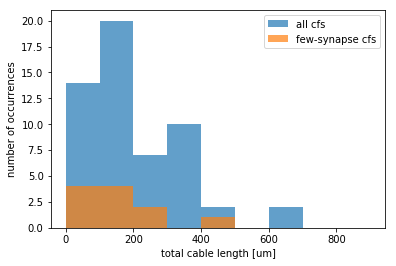

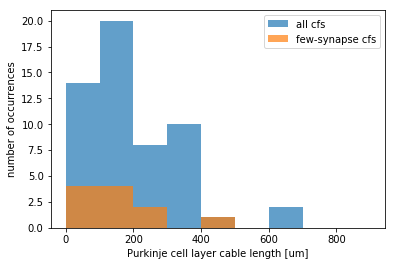

In [41]:
# p3
# plot for total cable length
p3_cls_fewsynsonly = []
p3_r_cls_fewsynsonly = []
for cid in range(len(p3_all_info['segid'])):
    clcurr = p3_all_info['cl_um'][cid]
    rclcurr = p3_all_info['r_cl_um'][cid]
    nsdistcurr = p3_all_info['nsyns'][cid]
    if (np.max(nsdistcurr) <= p3_50pc):
        p3_cls_fewsynsonly.append(clcurr)
        p3_r_cls_fewsynsonly.append(rclcurr)
        
plt.figure()
plt.hist(p3_cls_um,bins=bin_edges,alpha=0.7,label='all cfs')
plt.hist(p3_cls_fewsynsonly,bins=bin_edges,alpha=0.7,label='few-synapse cfs')
plt.xlabel('total cable length [um]')
plt.ylabel('number of occurrences')
plt.legend()
plt.show()

plt.figure()
plt.hist(p3_all_info['r_cl_um'],bins=bin_edges,alpha=0.7,label='all cfs')
plt.hist(p3_r_cls_fewsynsonly,bins=bin_edges,alpha=0.7,label='few-synapse cfs')
plt.xlabel('Purkinje cell layer cable length [um]')
plt.ylabel('number of occurrences')
plt.legend()
plt.show()


Perform Wilcoxon rank-sum test on the p3 cable length distributions for few-synapse vs all cfs

In [42]:
[wrsp3sva,pp3sva] = st.ranksums(p3_cls_um,p3_cls_fewsynsonly)
print(pp3sva)

[wrsp3svar,pp3svar] = st.ranksums(p3_all_info['r_cl_um'],p3_r_cls_fewsynsonly)
print(pp3svar)

0.28607966943041296
0.2708214210500415


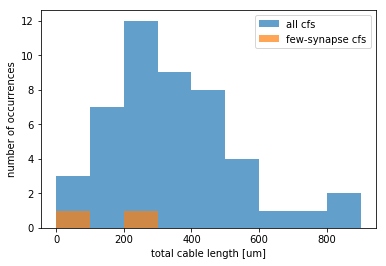

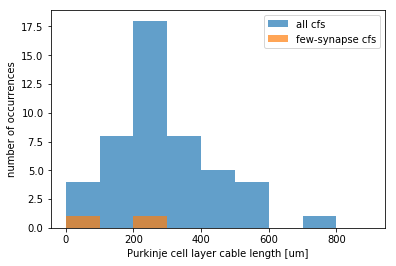

In [43]:
# p7
p7_cls_fewsynsonly = []
p7_r_cls_fewsynsonly = []
for cid in range(len(p7_all_info['segid'])):
    clcurr = p7_all_info['cl_um'][cid]
    rclcurr = p7_all_info['r_cl_um'][cid]
    nsdistcurr = p7_all_info['nsyns'][cid]
    if (np.max(nsdistcurr) <= p7_50pc):
        p7_cls_fewsynsonly.append(clcurr)
        p7_r_cls_fewsynsonly.append(rclcurr)
        
plt.figure()
plt.hist(p7_cls_um,bins=bin_edges,alpha=0.7,label='all cfs')
plt.hist(p7_cls_fewsynsonly,bins=bin_edges,alpha=0.7,label='few-synapse cfs')
plt.xlabel('total cable length [um]')
plt.ylabel('number of occurrences')
plt.legend()
plt.show()

plt.figure()
plt.hist(p7_all_info['r_cl_um'],bins=bin_edges,alpha=0.7,label='all cfs')
plt.hist(p7_r_cls_fewsynsonly,bins=bin_edges,alpha=0.7,label='few-synapse cfs')
plt.xlabel('Purkinje cell layer cable length [um]')
plt.ylabel('number of occurrences')
plt.legend()
plt.show()

In [44]:
[wrsp7sva,pp7sva] = st.ranksums(p7_cls_um,p7_cls_fewsynsonly)
print(pp7sva)

[wrsp7svar,pp7svar] = st.ranksums(p7_all_info['r_cl_um'],p7_r_cls_fewsynsonly)
print(pp7svar)

0.13748520759502328
0.21583309506838322
